In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os, sys
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
working_dir = r'../../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby(['source']).sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,053,154","4,051,248"


# Total Persons - City of SeaTac

In [5]:
index_map = {0:'Other',1:'City of SeaTac', 'All':'All'}
_df = df.rename(columns={'person_subarea':'subarea_flag'}).groupby(['subarea_flag','source'])['psexpfac'].sum()
_df_disp = _df[_df.index.get_level_values(0).isin([1])].reset_index().pivot(index='subarea_flag', columns='source', values='psexpfac')
_df_disp.index = _df_disp.index.map(index_map)
_df_disp

source,model,survey
subarea_flag,,
City of SeaTac,"85,538","64,566"


# Total Persons - Other Counties

In [6]:
_df_disp =_df[~_df.index.get_level_values(0).isin([1])].reset_index().pivot_table(index='subarea_flag', columns='source', values='psexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)
_df_disp.index = _df_disp.index.map(index_map)
_df_disp

source,model,survey
subarea_flag,,
Other,"3,967,616","3,986,682"
All,"3,967,616","3,986,682"


# Total Households

In [7]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,605,263","1,656,512"


## City of SeaTac

In [8]:
df = load_data('auto_ownership')
_df = df.rename(columns={'person_subarea':'subarea_flag'}).groupby(['subarea_flag','source'])['hhexpfac'].sum()
_df_disp=_df[_df.index.get_level_values(0).isin([1])].reset_index().pivot(index='subarea_flag', columns='source', values='hhexpfac')
_df_disp.index = _df_disp.index.map(index_map)
_df_disp

source,model,survey
subarea_flag,,
City of SeaTac,"31,964","28,297"


## Other

In [9]:
_df = df.rename(columns={'person_subarea':'subarea_flag'}).groupby(['subarea_flag','source'])['hhexpfac'].sum()
_df_disp=_df[~_df.index.get_level_values(0).isin([1])].reset_index().pivot_table(index='subarea_flag', columns='source', values='hhexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)
_df_disp.index = _df_disp.index.map(index_map)
_df_disp

source,model,survey
subarea_flag,,
Other,"1,573,299","1,628,216"
All,"1,573,299","1,628,216"


# Total Trips

In [10]:
df = load_data('trip_total')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,305,658","15,766,214"


## City of SeaTac

In [11]:
_df = df.rename(columns={'person_subarea':'subarea_flag'}).groupby(['subarea_flag','source'])['trexpfac'].sum()
_df_disp = _df[_df.index.get_level_values(0).isin([1])].reset_index().pivot(index='subarea_flag', columns='source', values='trexpfac')
_df_disp.index = _df_disp.index.map(index_map)
_df_disp

source,model,survey
subarea_flag,,
City of SeaTac,"351,642","172,595"


## Other

In [12]:
_df = df.rename(columns={'person_subarea':'subarea_flag'}).groupby(['subarea_flag','source'])['trexpfac'].sum()
_df_disp=_df[~_df.index.get_level_values(0).isin([1])].reset_index().pivot_table(index='subarea_flag', columns='source', values='trexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)
_df_disp.index = _df_disp.index.map(index_map)
_df_disp

source,model,survey
subarea_flag,,
Other,"15,954,016","15,593,619"
All,"15,954,016","15,593,619"


# Total Tours

In [13]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,410,674","6,807,631"


## City of SeaTac

In [14]:
_df = df.rename(columns={'person_subarea':'subarea_flag'}).groupby(['subarea_flag','source'])['toexpfac'].sum()
_df_disp=_df[_df.index.get_level_values(0).isin([1])].reset_index().pivot(index='subarea_flag', columns='source', values='toexpfac')
_df_disp.index = _df_disp.index.map(index_map)
_df_disp

source,model,survey
subarea_flag,,
City of SeaTac,"137,350","66,880"


## Other

In [15]:
_df = df.rename(columns={'person_subarea':'subarea_flag'}).groupby(['subarea_flag','source'])['toexpfac'].sum()
_df_disp=_df[~_df.index.get_level_values(0).isin([1])].reset_index().pivot_table(index='subarea_flag', columns='source', values='toexpfac', margins=True, aggfunc=sum).\
    drop('All',axis=1)
_df_disp.index = _df_disp.index.map(index_map)
_df_disp

source,model,survey
subarea_flag,,
Other,"6,273,324","6,740,750"
All,"6,273,324","6,740,750"


## Average Household Size

In [16]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.52
survey,2.45


## Pierce County

In [17]:
for county, df_county in df.groupby('person_subarea'):
    if county==1:
        print(index_map.get(int(county)))
        print(pd.DataFrame(
        df_county.groupby('source').apply(
            lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
            columns=['avg_hh_size']))

City of SeaTac
        avg_hh_size
source             
model          2.68
survey         2.28


## Other

In [18]:
for county, df_county in df.groupby('person_subarea'):
    if county!=1:
        print(index_map.get(int(county)))
        print(pd.DataFrame(
        df_county.groupby('source').apply(
            lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
            columns=['avg_hh_size']))

Other
        avg_hh_size
source             
model          2.52
survey         2.45


## Average Trips per Person

In [19]:
df_person = load_data('person_type')
df_person = df_person.groupby(['person_subarea', 'source'], as_index=False)['psexpfac'].sum()
df = load_data('trip_total')
df = df.join(df_person.set_index(['person_subarea', 'source']), on=['person_subarea', 'source'], how='left')
for county, df_county in df.groupby('person_subarea'):
    if county==1:
        print(index_map.get(int(county)))
        print(df_county.assign(tripsperprsn= lambda _df: (_df.trexpfac*1.0)/(_df.psexpfac*1.0)).\
              groupby(['mode', 'source'], as_index=False)['tripsperprsn'].sum().\
              pivot_table(index=['mode'], columns='source', values='tripsperprsn'))

City of SeaTac
source      model  survey
mode                     
Bike         0.06    0.18
HOV2         0.99    1.36
HOV3+        0.73    0.09
SOV          1.65    0.68
School Bus   0.08     NaN
TNC          0.04     NaN
Transit      0.20    0.27
Walk         0.36    0.09


In [20]:
for county, df_county in df.groupby('person_subarea'):
    if county!=1:
        print('\n' + index_map.get(int(county)))
        print(df_county.assign(tripsperprsn= lambda _df: (_df.trexpfac*1.0)/(_df.psexpfac*1.0)).\
              groupby(['mode', 'source'], as_index=False)['tripsperprsn'].sum().\
              pivot_table(index=['mode'], columns='source', values='tripsperprsn'))


Other
source      model  survey
mode                     
Bike         0.06    0.03
HOV2         0.92    0.88
HOV3+        0.64    0.63
SOV          1.67    1.67
School Bus   0.08    0.05
TNC          0.04    0.01
Transit      0.12    0.14
Walk         0.49    0.46


## Average Distance to Work

In [21]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean().pivot_table(index=['mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source        model survey    model survey    model survey
mode                                                      
Bike           0.00   0.00     5.30   4.59    35.34  27.58
HOV2           2.50   0.36    10.01   7.76    22.67  18.75
HOV3+          2.63   1.46    10.29  11.30    23.16  23.80
SOV            2.20   0.15     9.90   9.01    22.51  20.55
School Bus     1.01   0.00     4.82   3.91    13.15  11.61
TNC            0.52   0.01     2.47   9.70    10.53  20.37
Transit        1.99   4.35    13.94  13.79    54.70 130.21
Walk           0.00   0.00     0.73   1.34    14.62  26.96

## City of SeaTac

In [22]:
_df = df[df['dpurp'] == 'Work'].rename(columns={'person_subarea':'subarea_flag'}).groupby(['subarea_flag','mode','source']).mean()
_df_disp = _df[_df.index.get_level_values(0).isin([1])].pivot_table(index=['subarea_flag','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)
_df_disp = _df_disp.reset_index(0)
_df_disp['subarea_flag'] = _df_disp['subarea_flag'].map(index_map)
_df_disp.set_index('subarea_flag', append=True).swaplevel()

travcost        travdist        travtime       
source                       model survey    model survey    model survey
subarea_flag   mode                                                      
City of SeaTac Bike           0.00   0.00     5.29   9.96    35.27  59.80
               HOV2           1.63   0.00     8.05  10.10    18.75  20.64
               HOV3+          1.61    NaN     7.98    NaN    18.83    NaN
               SOV            1.58   0.00     7.85   8.89    18.81  21.32
               School Bus     0.97    NaN     4.83    NaN    15.58    NaN
               TNC            0.55    NaN     2.73    NaN    11.35    NaN
               Transit        1.27   2.75    10.71  11.09    45.67  34.01
               Walk           0.00    NaN     0.80    NaN    15.95    NaN

## Other

In [23]:
_df_disp = _df[~_df.index.get_level_values(0).isin([1])].pivot_table(index=['subarea_flag','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)
_df_disp = _df_disp.reset_index(0)
_df_disp['subarea_flag'] = _df_disp['subarea_flag'].map(index_map)
_df_disp.set_index('subarea_flag', append=True).swaplevel()

travcost        travdist        travtime       
source                     model survey    model survey    model survey
subarea_flag mode                                                      
Other        Bike           0.00   0.00     5.30   3.25    35.35  19.52
             HOV2           2.72   0.45    10.49   7.18    23.65  18.28
             HOV3+          2.88   1.46    10.86  11.30    24.24  23.80
             SOV            2.36   0.18    10.41   9.04    23.44  20.35
             School Bus     1.03   0.00     4.82   3.91    12.55  11.61
             TNC            0.51   0.01     2.41   9.70    10.33  20.37
             Transit        2.17   4.75    14.74  14.47    56.96 154.26
             Walk           0.00   0.00     0.71   1.34    14.28  26.96

## Average Distance to School

In [24]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean().pivot_table(index=['mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)

travcost        travdist        travtime       
source        model survey    model survey    model survey
mode                                                      
Bike           0.00   0.00     2.79   1.44    18.59   8.64
HOV2           0.69   0.04     3.34   3.69    10.71  11.35
HOV3+          0.72   0.00     3.48   4.43    10.94  12.28
SOV            1.39   0.26     6.51   7.98    16.29  20.94
School Bus     0.65   0.00     3.22   2.72    10.54   9.27
TNC            0.48   0.18     2.39   3.22     9.18  15.08
Transit        0.46   4.21     6.97  10.18    42.30  29.29
Walk           0.00   0.00     1.42   0.84    28.30  16.84

## City of SeaTac

In [25]:
_df = df[df['dpurp'] == 'School'].rename(columns={'person_subarea':'subarea_flag'}).groupby(['subarea_flag','mode','source']).mean()
_df_disp = _df[_df.index.get_level_values(0).isin([1])].pivot_table(index=['subarea_flag','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False, aggfunc=sum)
_df_disp = _df_disp.reset_index(0)
_df_disp['subarea_flag'] = _df_disp['subarea_flag'].map(index_map)
_df_disp.set_index('subarea_flag', append=True).swaplevel()

travcost        travdist        travtime       
source                       model survey    model survey    model survey
subarea_flag   mode                                                      
City of SeaTac Bike           0.00    NaN     2.71    NaN    18.10    NaN
               HOV2           0.67   0.00     3.36   2.17    10.68   8.41
               HOV3+          0.71   0.00     3.53   3.32    10.95  10.30
               SOV            1.27    NaN     6.35    NaN    16.14    NaN
               School Bus     0.65    NaN     3.27    NaN    10.49    NaN
               TNC            0.50    NaN     2.50    NaN     9.15    NaN
               Transit        0.39    NaN     8.12    NaN    43.62    NaN
               Walk           0.00    NaN     1.52    NaN    30.46    NaN

## Other

In [26]:
_df_disp=_df[~_df.index.get_level_values(0).isin([1])].pivot_table(index=['subarea_flag','mode'], columns='source', values=['travdist', 'travtime', 'travcost'], margins=False)
_df_disp = _df_disp.reset_index(0)
_df_disp['subarea_flag'] = _df_disp['subarea_flag'].map(index_map)
_df_disp.set_index('subarea_flag', append=True).swaplevel()

travcost        travdist        travtime       
source                     model survey    model survey    model survey
subarea_flag mode                                                      
Other        Bike           0.00   0.00     2.81   1.44    18.72   8.64
             HOV2           0.69   0.05     3.34   4.07    10.72  12.09
             HOV3+          0.72   0.00     3.46   4.71    10.94  12.77
             SOV            1.43   0.26     6.55   7.98    16.33  20.94
             School Bus     0.65   0.00     3.20   2.72    10.55   9.27
             TNC            0.48   0.18     2.36   3.22     9.19  15.08
             Transit        0.47   4.21     6.69  10.18    41.96  29.29
             Walk           0.00   0.00     1.39   0.84    27.76  16.84

## Transit Pass Ownership

In [27]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,329,080","3,264,963"
1,"724,074","786,285"


## City of SeaTac

In [28]:
_df = df.rename(columns={'person_subarea':'subarea_flag'})
_df_disp = _df[_df.subarea_flag.isin([1])].pivot_table(index=['subarea_flag','ptpass'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)
_df_disp = _df_disp.reset_index(0)
_df_disp['subarea_flag'] = _df_disp['subarea_flag'].map(index_map)
_df_disp.set_index('subarea_flag', append=True).swaplevel()

psexpfac       
source                   model survey
subarea_flag   ptpass                
City of SeaTac 0        69,153 54,468
               1        16,385 10,098

## Other

In [29]:
_df_disp=_df[~_df.subarea_flag.isin([1])].pivot_table(index=['subarea_flag','ptpass'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)
_df_disp = _df_disp.reset_index(0)
_df_disp['subarea_flag'] = _df_disp['subarea_flag'].map(index_map)
_df_disp.set_index('subarea_flag', append=True).swaplevel()

psexpfac          
source                  model    survey
subarea_flag ptpass                    
Other        0      3,259,927 3,210,495
             1        707,689   776,187

In [30]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"2,019","9,796"
Full-Time Worker,"461,708","709,233"
High School Student Age 16+,"127,228","5,549"
Non-Working Adult Age 65+,358,329
Non-Working Adult Age <65,"17,674",NaN
Part-Time Worker,"38,791","44,097"
University Student,"76,296","15,414"


## City of SeaTac

In [31]:
_df = df[df['ptpass']==1].rename(columns={'person_subarea':'subarea_flag'})
_df_disp=_df[_df.subarea_flag.isin([1])].pivot_table(index=['subarea_flag','pptyp'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)
_df_disp = _df_disp.reset_index(0)
_df_disp['subarea_flag'] = _df_disp['subarea_flag'].map(index_map)
_df_disp.set_index('subarea_flag', append=True).swaplevel()

psexpfac       
source                                        model survey
subarea_flag   pptyp                                      
City of SeaTac Child Age 5-15                    61    NaN
               Full-Time Worker              11,108  9,520
               High School Student Age 16+    2,184    NaN
               Non-Working Adult Age 65+         15    NaN
               Non-Working Adult Age <65        448    NaN
               Part-Time Worker               1,117    578
               University Student             1,452    NaN

## Other Counties

In [32]:
_df_disp=_df[~_df.subarea_flag.isin([1])].pivot_table(index=['subarea_flag','pptyp'], columns='source', values=['psexpfac'], margins=False, aggfunc=sum)
_df_disp = _df_disp.reset_index(0)
_df_disp['subarea_flag'] = _df_disp['subarea_flag'].map(index_map)
_df_disp.set_index('subarea_flag', append=True).swaplevel()

psexpfac        
source                                      model  survey
subarea_flag pptyp                                       
Other        Child Age 5-15                 1,958   9,796
             Full-Time Worker             450,600 699,713
             High School Student Age 16+  125,044   5,549
             Non-Working Adult Age 65+        343     329
             Non-Working Adult Age <65     17,226     NaN
             Part-Time Worker              37,674  43,519
             University Student            74,844  15,414

# Auto Ownership

In [33]:
df = load_data('auto_ownership')
df.loc[df['hhvehs'] >= 3, 'hhvehs'] = '3+'
df.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

source,model,survey
hhvehs,,
0.0,"106,490","129,688"
1.0,"487,674","512,273"
2.0,"584,038","624,897"
3+,"427,061","389,654"


In [34]:
df1 = df[df['person_subarea'] == 1]
print('Auto Ownership for City of SeaTac')
df1.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

Auto Ownership for City of SeaTac


source,model,survey
hhvehs,,
0.0,"2,009","5,306"
1.0,"11,073","12,071"
2.0,"10,967","5,962"
3+,"7,915","4,958"


In [35]:
df2 = df[df['person_subarea'] != 1]
print('Auto Ownership for Other')
df2.pivot_table(index='hhvehs', columns='source', aggfunc='sum', values='hhexpfac')

Auto Ownership for Other


source,model,survey
hhvehs,,
0.0,"104,481","124,382"
1.0,"476,601","500,202"
2.0,"573,071","618,935"
3+,"419,146","384,696"


## By Income

In [36]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0.0    model   52,017   22,791   11,363    3,439  16,871
       survey  64,043   27,901   17,279        0  20,465
1.0    model  116,581  106,833   81,822   29,556 152,783
       survey 138,715  102,527  110,953        0 160,079
2.0    model   32,573   58,921   77,921   38,547 376,068
       survey  90,579   85,436   77,247        0 371,635
3.0    model    8,259   16,575   30,549   16,473 224,821
       survey  46,917   19,832   22,998        0 177,643
4+     model    3,290    6,884   11,117    5,809 103,275
       survey   9,063      759   13,427        0  99,015

In [37]:
df1 = df[df['person_subarea'] == 1]

print('Income summaries for City of SeaTac')
pd.pivot_table(df1, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

Income summaries for City of SeaTac


income_bin     0-$20k  $20-40k  $40-60k  $60-75k  >$75k
hhvehs source                                          
0.0    model    1,034      593      197       57    128
       survey   1,345        0    3,961        0      0
1.0    model    2,957    3,695    1,882      645  1,894
       survey   2,152    4,872    4,898        0    149
2.0    model      678    2,035    2,010      941  5,303
       survey     114      578       13        0  5,257
3.0    model      161      544      831      455  3,401
       survey       0        0        0        0  3,154
4+     model       57      280      282      157  1,747
       survey       0        0        0        0  1,803

In [38]:
df2 = df[df['person_subarea'] != 1]

print('Income summaries for Other')
pd.pivot_table(df2, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

Income summaries for Other


income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0.0    model   50,983   22,198   11,166    3,382  16,743
       survey  62,698   27,901   13,318        0  20,465
1.0    model  113,624  103,138   79,940   28,911 150,889
       survey 136,563   97,654  106,055        0 159,930
2.0    model   31,895   56,886   75,911   37,606 370,765
       survey  90,464   84,859   77,234        0 366,378
3.0    model    8,098   16,031   29,718   16,018 221,420
       survey  46,917   19,832   22,998        0 174,489
4+     model    3,233    6,604   10,835    5,652 101,528
       survey   9,063      759   13,427        0  97,212

In [39]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='person_subarea', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='person_subarea', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

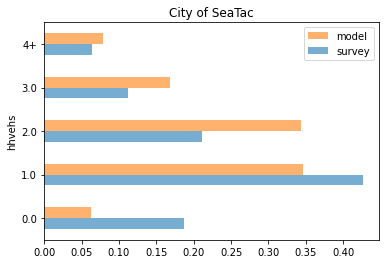

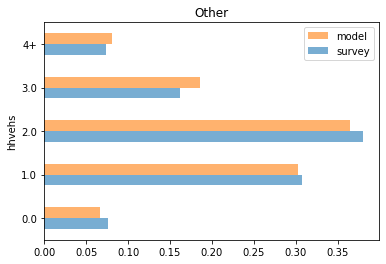

In [40]:
for county in df['person_subarea'].unique()[::-1]:
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=index_map.get(int(county)), legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [41]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County      King Kitsap  Pierce Snohomish
Home County                                   
King        1,015,115    996  35,978    38,549
Kitsap         21,134 77,383  10,135       929
Pierce        106,767  7,266 231,569       498
Snohomish     153,194    144     573   219,490